In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('TATASTEEL.BO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,24.564999,26.400000,24.510000,26.299999,1.994953,47540800.0
1,2009-05-05,26.799999,28.860001,26.500000,28.615000,2.170554,64828750.0
2,2009-05-06,28.650000,29.000000,26.809999,27.064999,2.052981,44272320.0
3,2009-05-07,27.790001,29.900000,27.209999,29.434999,2.232754,78072560.0
4,2009-05-08,30.000000,30.290001,28.070000,28.250000,2.142868,61331990.0


In [3]:
data = data.drop('Adj Close',axis=1)
data = data.dropna()

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
# Step 1: Prepare Data
features = ['Open', 'High', 'Low', 'Volume']  # Features used for prediction
X = data[features]
y = data['Close']
X,y

(           Open       High        Low      Volume
 0     24.564999  26.400000  24.510000  47540800.0
 1     26.799999  28.860001  26.500000  64828750.0
 2     28.650000  29.000000  26.809999  44272320.0
 3     27.790001  29.900000  27.209999  78072560.0
 4     30.000000  30.290001  28.070000  61331990.0
 ...         ...        ...        ...         ...
 2634  47.090000  47.599998  46.505001   5237900.0
 2635  47.299999  47.525002  47.020000   4066790.0
 2636  47.310001  47.645000  46.500000   6087850.0
 2637  47.275002  48.775002  47.215000   8613520.0
 2638  48.299999  48.615002  47.950001   5972110.0
 
 [2631 rows x 4 columns],
 0       26.299999
 1       28.615000
 2       27.064999
 3       29.434999
 4       28.250000
           ...    
 2634    47.470001
 2635    47.200001
 2636    46.775002
 2637    48.494999
 2638    48.375000
 Name: Close, Length: 2631, dtype: float64)

In [6]:
# Step 2: Train-Test Split
train_data = data[(data['Date'] >= '2009-05-04') & (data['Date'] <= '2017-04-03')]
test_data = data[(data['Date'] >= '2017-04-04') & (data['Date'] <= '2020-01-04')]

X_train, X_test = train_data[features], test_data[features]
y_train, y_test = train_data['Close'], test_data['Close']
X_train,X_test,y_train,y_test

(           Open       High        Low      Volume
 0     24.564999  26.400000  24.510000  47540800.0
 1     26.799999  28.860001  26.500000  64828750.0
 2     28.650000  29.000000  26.809999  44272320.0
 3     27.790001  29.900000  27.209999  78072560.0
 4     30.000000  30.290001  28.070000  61331990.0
 ...         ...        ...        ...         ...
 1957  47.844997  48.224998  47.740002   3760850.0
 1958  48.099998  48.434998  48.029999   5071750.0
 1959  48.400002  48.645000  47.599998   3842640.0
 1960  48.000000  48.564999  47.910000   4188900.0
 1961  48.500000  48.950001  48.380001  15506590.0
 
 [1954 rows x 4 columns],
            Open       High        Low     Volume
 1962  48.599998  49.790001  48.599998  5468290.0
 1963  49.314999  50.434998  48.430000  7988870.0
 1964  50.244999  50.580002  49.099998  5829410.0
 1965  49.610001  49.844997  49.070000  4537090.0
 1966  49.580002  49.580002  48.650002  3275080.0
 ...         ...        ...        ...        ...
 2634  47.

In [7]:
# Step 3: Model Training
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:




# Step 4: Model Evaluation
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Step 5: Prediction (if needed)
# new_data = ...  # Your new data
# predicted_close = rf_model.predict(new_data)


Mean Absolute Error: 0.6660259572673581
Mean Squared Error: 2.159817824370541
Root Mean Squared Error: 1.469631866955307


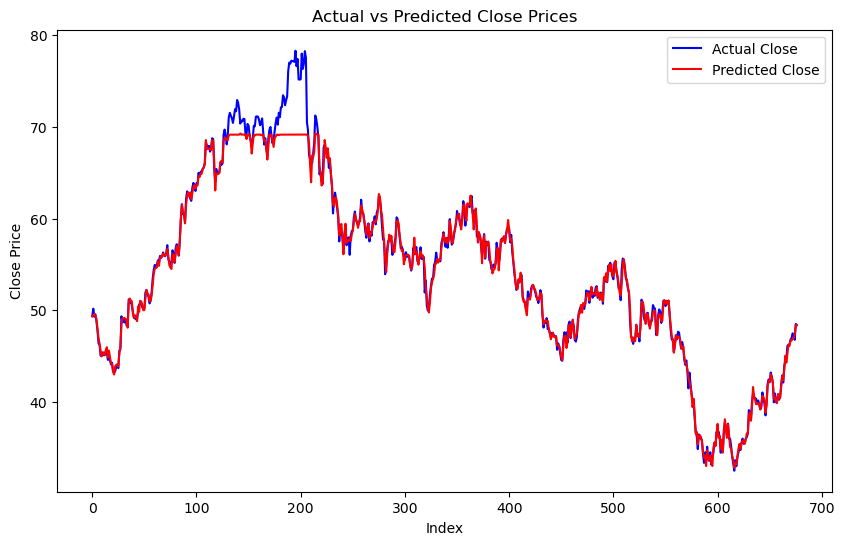

In [9]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted Close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()
